# Searching for chemical composition of Superconductors

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import time
import matplotlib.pyplot as plt

# inline matplotlib
%matplotlib inline

# if running in jupyter lab
# %matplotlib widget

# if running in jupyter notebook
# %matplotlib notebook

### Superconductor data 

In [2]:
data = pd.read_csv("Supercon_data_2.csv")

#### Separate elements and their stoichiometric weights into columns

In [3]:
comp = list(data["name"])

comp2str = []
comp2wt = []
for s in comp:
    temp2str = []
    temp2beg = []
    temp2end = []
    temp2wt = []
    i = 0
    while (i<len(s)):
        if ((s[i]).isalpha()):
            try:
                if ((s[i+1]).islower()):
                    temp2str.append(s[i:i+2])
                    if (i>0):
                        temp2end.append(i)
                    i += 2
                    temp2beg.append(i)
                else:
                    temp2str.append(s[i:i+1])
                    if (i>0):
                        temp2end.append(i)
                    i += 1
                    temp2beg.append(i)
            except:
                temp2str.append(s[i:i+1])
                if (i>0):
                    temp2end.append(i)
                i += 1
                temp2end.append(i)
        else:
            i += 1
    temp2end.append(len(s))
    comp2str.append(temp2str)
    max
    for i,j in zip(temp2beg,temp2end):
        if (i==j):
            temp2wt.append(1)
        else:
            temp2wt.append(float(s[i:j]))
            if (float(s[i:j])>100):
                print("stochiometric weight > 100 :",temp2str, temp2wt, s)
    comp2wt.append(temp2wt)
    
#     if (len(s)>40):
#         print("composition string length > 40 :",temp2str, temp2wt, s)


stochiometric weight > 100 : ['Pr', 'Ce', 'Cu', 'O'] [185.0] Pr185Ce0.15Cu1O4
stochiometric weight > 100 : ['Pb', 'Sr', 'Dy', 'Ce', 'Cu', 'O'] [2.0, 2.0, 186.0] Pb2Sr2Dy186Ce2.79Cu3O16
stochiometric weight > 100 : ['B'] [105.0] B105


#### Rename column header as we will use Tc for Technetium

In [4]:
# for symbol in list(elements["Symbol"]):
#     data[symbol] = 0

data.rename(columns={'Tc' : 'Critical Temperature',
                    'name' : 'Compound'},
           inplace=True)

#### Drop compounds with zero Critical Temperature

In [5]:
indexNames = data[ data['Critical Temperature'] == 0 ].index

data.drop(indexNames , inplace=True)

print("remaining data points :", data.shape[0])

remaining data points : 12448


#### Set the stoichiometric coefficients

In [6]:
for symbols in comp2str:
    for symbol in symbols:
        data[symbol] = 0.0

for row,symbols,weights in zip(data.index,comp2str,comp2wt):
    for symbol,weight in zip(symbols,weights):
        try:
            data.at[row,symbol] = weight
        except:
            print(row,symbol,weight)
            print(data.at[row,"Compound"])

#### Plot of stoichimetric weight of elements vs Critical Temperature

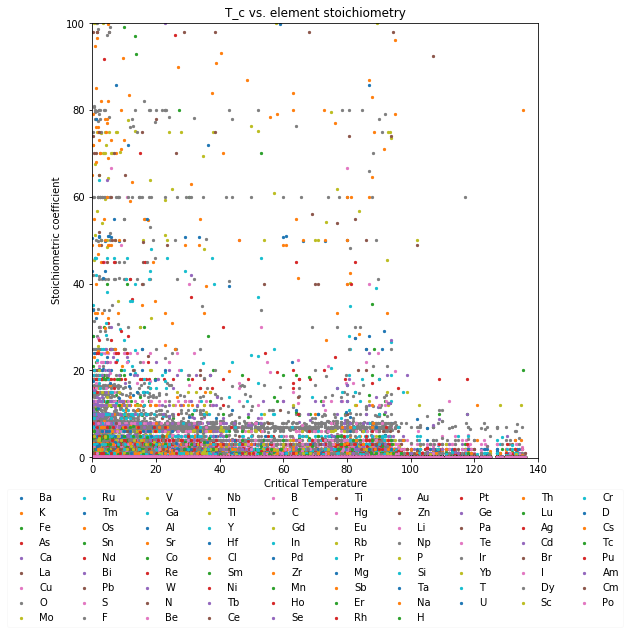

<Figure size 432x288 with 0 Axes>

In [7]:
i=0
symbols = list(data.head(0))[2:]

plt.close()

fig,ax=plt.subplots(1,1,figsize=(8,8))
# ax.scatter(x,y)
ax.set_title("T_c vs. element stoichiometry")
plt.xlabel("Critical Temperature")
plt.ylabel("Stoichiometric coefficient")

xshift = 0
xrange = 140
yshift = 0
yrange = 100

plt.xlim(-0.1+xshift,xrange+0.1+xshift)
plt.ylim(-0.1+yshift,yrange+0.1+yshift)

for symbol in symbols:
#     x = data.sort_values("Critical Temperature")["Critical Temperature"]
    x = data["Critical Temperature"]
    
#     y = data.sort_values("Critical Temperature")[symbol]
    y = data[symbol]
    ax.scatter(x, y, label=symbol, s=5)
#     ax.plot(x, y, label=symbol)
    i += 1
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), fancybox=True, framealpha=0.1, ncol=10)

plt.show()
plt.draw()

### Basic element properties

In [8]:
elements = pd.read_csv("elements_data_2.csv")

#### Set unknown electronegativity
* Electronegativity of Deuterium and Tritium set same as Hydrogen
* Unknown Noble gas electronegativity set to 0
* Elements with Z>106 set to zero as they are irrelevant

In [9]:
indexNames = list(elements[elements["Atomic number"] == 1].index)
indexH = int(elements[elements["Symbol"].isin(["H"])].index[0])
elements.loc[indexNames,"Electro-negativity"] = elements.at[indexH,"Electro-negativity"]

indexNames = list(elements[elements["Electro-negativity"].isin(["NaN"])].index)
elements.loc[indexNames,"Electro-negativity"] = 0

#### Construct features using atomic number(Z), atomic mass(m_a), electronegativity(X) and stoichiometric coefficient

In [10]:
for symbols in comp2str:
    for symbol in symbols:
        data["Z_"+symbol] = 0
        data["m_a_"+symbol] = 0
        data["X_"+symbol] = 0
    
for row,symbols,weights in zip(data.index,comp2str,comp2wt):
    for symbol,weight in zip(symbols,weights):
            indexElem = elements[elements["Symbol"].isin([symbol])].index[0]
            
            data.at[row,"Z_"+symbol] = weight*elements.at[indexElem, "Atomic number"]
            data.at[row,"m_a_"+symbol] = weight*elements.at[indexElem, "Atomic weight (u)"]
            data.at[row,"X_"+symbol] = weight*elements.at[indexElem, "Electro-negativity"]


#### Plot of feature (Atomic number) of elements vs Critical Temperature

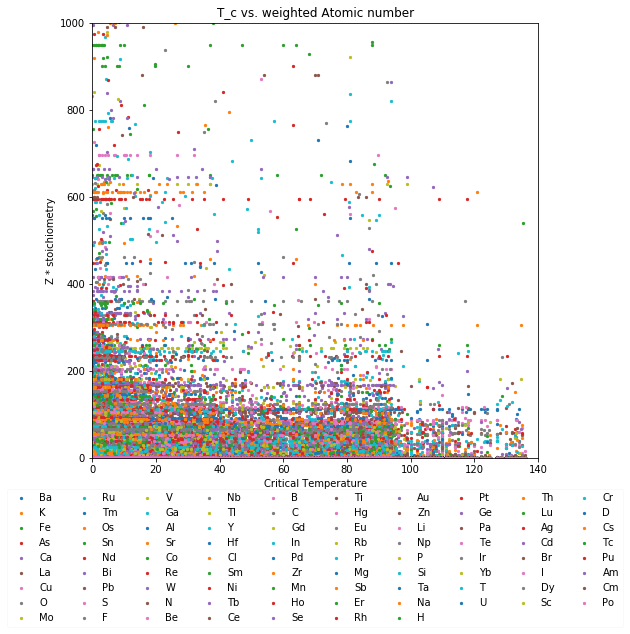

<Figure size 432x288 with 0 Axes>

In [11]:
i=0
sym_len = len([col for col in data if col.startswith('Z_')])
symbols = list(data.head(0))[2:2+sym_len]

plt.close()

fig,ax=plt.subplots(1,1,figsize=(8,8))
# ax.scatter(x,y)
ax.set_title("T_c vs. weighted Atomic number")
plt.xlabel("Critical Temperature")
plt.ylabel("Z * stoichiometry")

xshift = 0
xrange = 140
yshift = 0
yrange = 1000

plt.xlim(-0.1+xshift,xrange+0.1+xshift)
plt.ylim(-0.1+yshift,yrange+0.1+yshift)

for symbol in symbols:
#     x = data.sort_values("Critical Temperature")["Critical Temperature"]
    x = data["Critical Temperature"]
    
#     y = data.sort_values("Critical Temperature")[symbol]
    y = data["Z_"+symbol]
    ax.scatter(x, y, label=symbol, s=5)
#     ax.plot(x, y, label=symbol)
    i += 1
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), fancybox=True, framealpha=0.1, ncol=10)

plt.show()
plt.draw()

#### Plot of feature (Atomic mass) of elements vs Critical Temperature

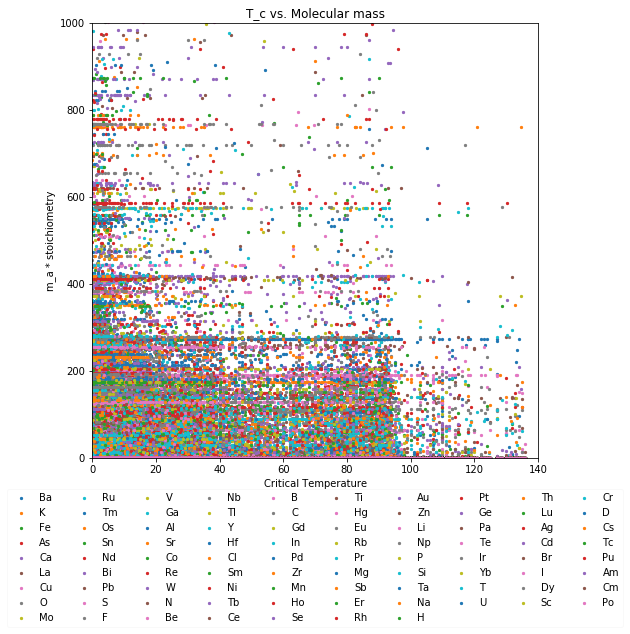

<Figure size 432x288 with 0 Axes>

In [12]:
i=0
sym_len = len([col for col in data if col.startswith('m_a_')])
symbols = list(data.head(0))[2:2+sym_len]

plt.close()

fig,ax=plt.subplots(1,1,figsize=(8,8))
# ax.scatter(x,y)
ax.set_title("T_c vs. Molecular mass")
plt.xlabel("Critical Temperature")
plt.ylabel("m_a * stoichiometry")

xshift = 0
xrange = 140
yshift = 0
yrange = 1000

plt.xlim(-0.1+xshift,xrange+0.1+xshift)
plt.ylim(-0.1+yshift,yrange+0.1+yshift)

for symbol in symbols:
#     x = data.sort_values("Critical Temperature")["Critical Temperature"]
    x = data["Critical Temperature"]
    
#     y = data.sort_values("Critical Temperature")[symbol]
    y = data["m_a_"+symbol]
    ax.scatter(x, y, label=symbol, s=5)
#     ax.plot(x, y, label=symbol)
    i += 1
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), fancybox=True, framealpha=0.1, ncol=10)

plt.show()
plt.draw()

#### Plot of feature (Electro-negativity) of elements vs Critical Temperature

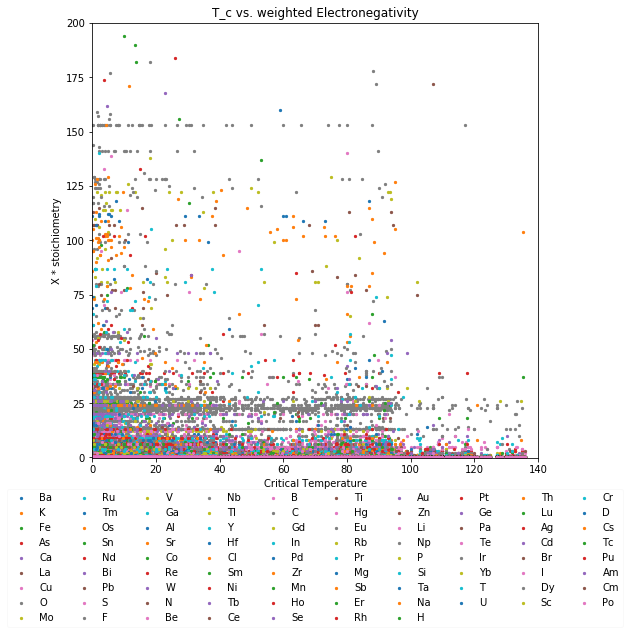

<Figure size 432x288 with 0 Axes>

In [13]:
i=0
sym_len = len([col for col in data if col.startswith('X_')])
symbols = list(data.head(0))[2:2+sym_len]

plt.close()

fig,ax=plt.subplots(1,1,figsize=(8,8))
# ax.scatter(x,y)
ax.set_title("T_c vs. weighted Electronegativity")
plt.xlabel("Critical Temperature")
plt.ylabel("X * stoichiometry")


xshift = 0
xrange = 140
yshift = 0
yrange = 200

plt.xlim(-0.1+xshift,xrange+0.1+xshift)
plt.ylim(-0.1+yshift,yrange+0.1+yshift)

for symbol in symbols:
#     x = data.sort_values("Critical Temperature")["Critical Temperature"]
    x = data["Critical Temperature"]
    
#     y = data.sort_values("Critical Temperature")[symbol]
    y = data["X_"+symbol]
    ax.scatter(x, y, label=symbol, s=5)
#     ax.plot(x, y, label=symbol)
    i += 1
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.06), fancybox=True, framealpha=0.1, ncol=10)

plt.show()
plt.draw()

### Check for correlation of the cumulative features

In [14]:
sym_len = len([col for col in data if col.startswith('X_')])
symbols = list(data.head(0))[2:2+sym_len]


data["Cumulative Z"] = 0.0
data["Cumulative m_a"] = 0.0
data["Cumulative X"] = 0.0

for row,symbols,weights in zip(data.index,comp2str,comp2wt):
    wt = 0
    for symbol,weight in zip(symbols,weights):
        wt += weight
        data.at[row,"Cumulative Z"] += weight*data.at[row,"Z_"+symbol]
        data.at[row,"Cumulative m_a"] += weight*data.at[row,"m_a_"+symbol]
        data.at[row,"Cumulative X"] += weight*data.at[row,"X_"+symbol]
    data.at[row,"Cumulative Z"] = data.at[row,"Cumulative Z"]/(wt+0.00000000000001)
    data.at[row,"Cumulative m_a"] = data.at[row,"Cumulative m_a"]/(wt+0.00000000000001)
    data.at[row,"Cumulative X"] = data.at[row,"Cumulative X"]/(wt+0.00000000000001)

In [15]:
data_Tc = data["Critical Temperature"]
data_Z = data["Cumulative Z"]
data_m_a = data["Cumulative m_a"]
data_X = data["Cumulative X"]

covariance_Z_Tc = np.cov(data_Z,data_Tc)
pearson_corr_Z_Tc, _ = stats.pearsonr(data_Z,data_Tc)
spearman_corr_Z_Tc, _ = stats.spearmanr(data_Z,data_Tc)

covariance_m_a_Tc = np.cov(data_m_a,data_Tc)
pearson_corr_m_a_Tc, _ = stats.pearsonr(data_m_a,data_Tc)
spearman_corr_m_a_Tc, _ = stats.spearmanr(data_m_a,data_Tc)

covariance_X_Tc = np.cov(data_X,data_Tc)
pearson_corr_X_Tc, _ = stats.pearsonr(data_X,data_Tc)
spearman_corr_X_Tc, _ = stats.spearmanr(data_X,data_Tc)

covariance_Z_m_a = np.cov(data_Z,data_m_a)
pearson_corr_Z_m_a, _ = stats.pearsonr(data_Z,data_m_a)
spearman_corr_Z_m_a, _ = stats.spearmanr(data_Z,data_m_a)

covariance_m_a_X = np.cov(data_m_a,data_X)
pearson_corr_m_a_X, _ = stats.pearsonr(data_m_a,data_X)
spearman_corr_m_a_X, _ = stats.spearmanr(data_m_a,data_X)

covariance_X_Z = np.cov(data_X,data_Z)
pearson_corr_X_Z, _ = stats.pearsonr(data_X,data_Z)
spearman_corr_X_Z, _ = stats.spearmanr(data_X,data_Z)

print("covariance (Z,Tc) = ", covariance_Z_Tc.ravel())
print("pearson correlation (Z,Tc) = ", pearson_corr_Z_Tc)
print("spearman correlation (Z,Tc) = ",spearman_corr_Z_Tc)

print("covariance (m_a,Tc) = ", covariance_m_a_Tc.ravel())
print("pearson correlation (m_a,Tc) = ", pearson_corr_m_a_Tc)
print("spearman correlation (m_a,Tc) = ",spearman_corr_m_a_Tc)

print("covariance (X,Tc) = ", covariance_X_Tc.ravel())
print("pearson correlation (X,Tc) = ", pearson_corr_X_Tc)
print("spearman correlation (X,Tc) = ",spearman_corr_X_Tc)

print("covariance (Z,m_a) = ", covariance_Z_m_a.ravel())
print("pearson correlation (Z,m_a) = ", pearson_corr_Z_m_a)
print("spearman correlation (Z,m_a) = ",spearman_corr_Z_m_a)

print("covariance (m_a,X) = ", covariance_m_a_X.ravel())
print("pearson correlation (m_a,X) = ", pearson_corr_m_a_X)
print("spearman correlation (m_a,X) = ",spearman_corr_m_a_X)

print("covariance (X,Z) = ", covariance_X_Z.ravel())
print("pearson correlation (X,Z) = ", pearson_corr_X_Z)
print("spearman correlation (X,Z) = ",spearman_corr_X_Z)


covariance (Z,Tc) =  [1.81768966e+05 1.81575891e+02 1.81575891e+02 8.24572571e+02]
pearson correlation (Z,Tc) =  0.01483145892796812
spearman correlation (Z,Tc) =  -0.021015716262059475
covariance (m_a,Tc) =  [1.03326130e+06 4.37875353e+02 4.37875353e+02 8.24572571e+02]
pearson correlation (m_a,Tc) =  0.01500137187668943
spearman correlation (m_a,Tc) =  -0.02143967655436392
covariance (X,Tc) =  [323.5775739    4.56978045   4.56978045 824.57257091]
pearson correlation (X,Tc) =  0.008846911561791595
spearman correlation (X,Tc) =  -0.007359778195096264
covariance (Z,m_a) =  [ 181768.96564144  432794.74283236  432794.74283236 1033261.29745529]
pearson correlation (Z,m_a) =  0.9986585569414305
spearman correlation (Z,m_a) =  0.995661491364899
covariance (m_a,X) =  [1.03326130e+06 1.32237701e+04 1.32237701e+04 3.23577574e+02]
pearson correlation (m_a,X) =  0.7232043061677617
spearman correlation (m_a,X) =  0.601189694677499
covariance (X,Z) =  [   323.5775739    5705.99026681   5705.99026681

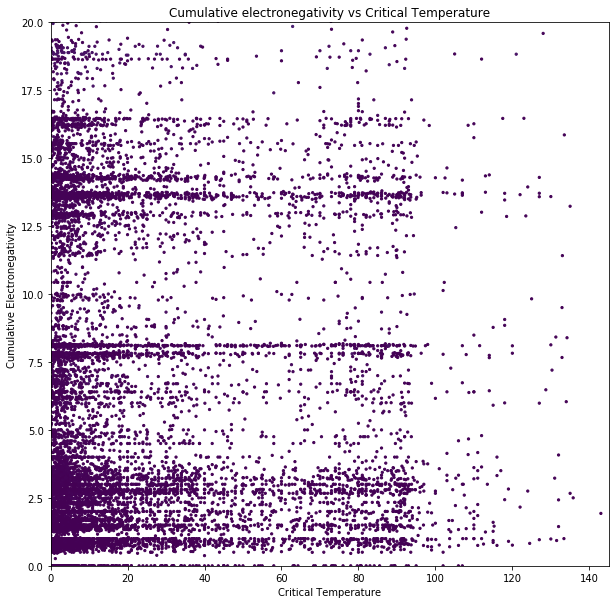

In [17]:
plt.figure(figsize=(10,10))
plt.xlim(0,145)
plt.ylim(0,20)
plt.title("Cumulative electronegativity vs Critical Temperature")
plt.ylabel("Cumulative Electronegativity")
plt.xlabel("Critical Temperature")
plt.scatter(data_Tc,data_X, s=5, c=(data_Z))
# plt.colorbar()
plt.show()
# plt.savefig("plot1.pdf")

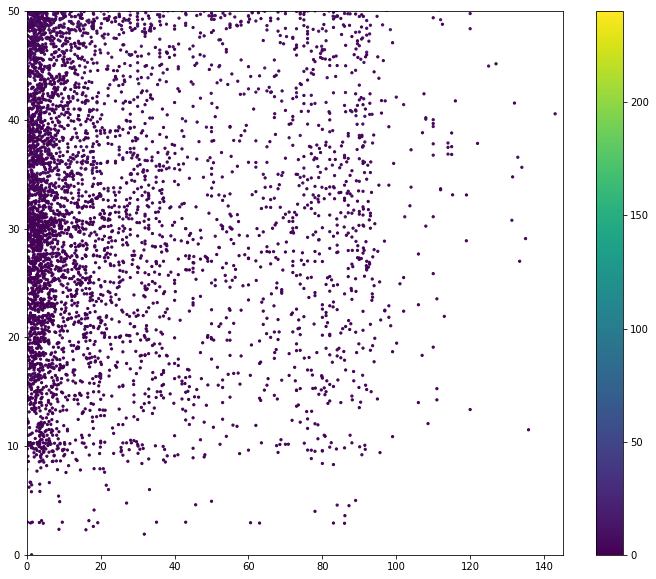

In [18]:
plt.figure(figsize=(12,10))
plt.xlim(0,145)
plt.ylim(0,50)
plt.scatter(data_Tc,data_Z, s=5,c=(data_X))
plt.colorbar()
plt.show()

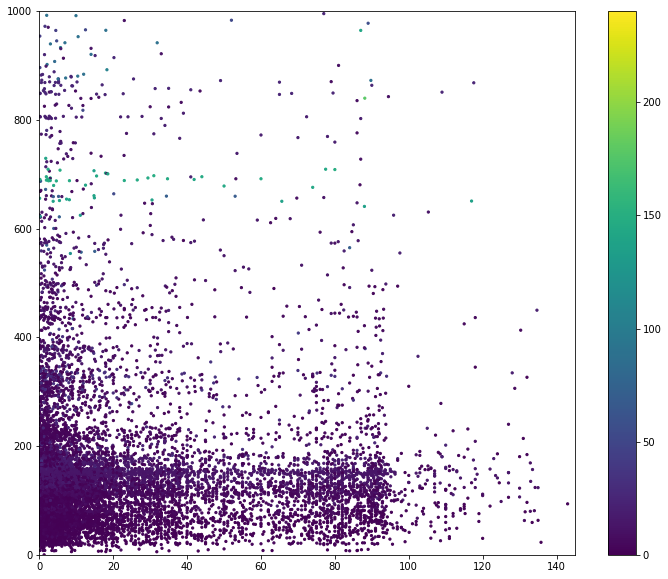

In [19]:
plt.figure(figsize=(12,10))
plt.xlim(0,145)
plt.ylim(0,1000)
plt.scatter(data_Tc,data_m_a, s=5, c=(data_X))
plt.colorbar()
plt.show()

D:\sayan\Apps\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


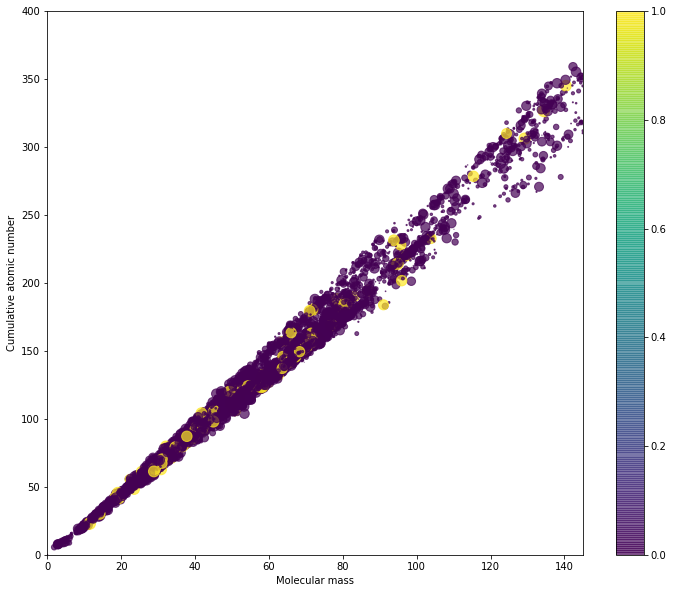

In [20]:
sorted_Tc = np.argsort(data_Tc)[::-1]
plt.figure(figsize=(12,10))
plt.xlim(0,145)
plt.ylim(0,400)
plt.xlabel("Molecular mass")
plt.ylabel("Cumulative atomic number")
plt.scatter(data_Z[sorted_Tc], data_m_a[sorted_Tc], s=data_Tc[sorted_Tc], c=np.floor(data_Tc[sorted_Tc]/100), alpha =0.7)
plt.colorbar()
plt.show()

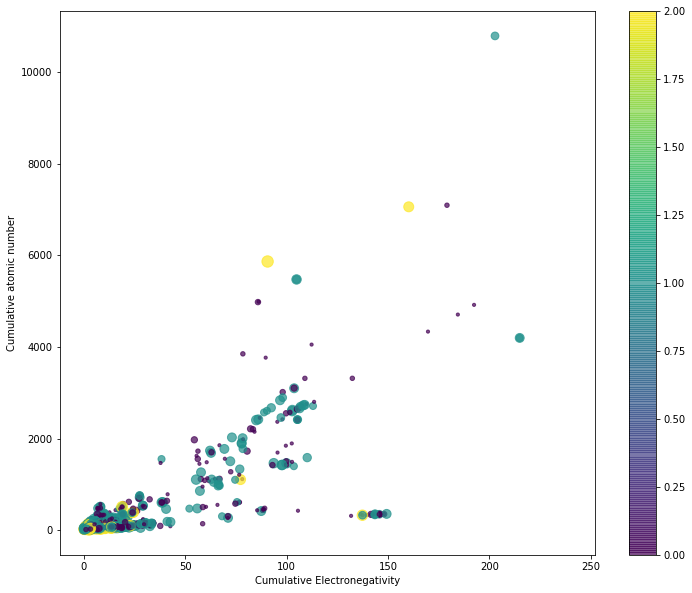

In [21]:
sorted_Tc = np.argsort(data_Tc)[::-1]
plt.figure(figsize=(12,10))
# plt.xlim(0,145)
# plt.ylim(0,20)
plt.xlabel("Cumulative Electronegativity")
plt.ylabel("Cumulative atomic number")
plt.scatter(data_X[sorted_Tc], data_Z[sorted_Tc], s=10*np.floor(data_Tc[sorted_Tc]/10), c=np.floor(data_Tc[sorted_Tc]/50), alpha=0.7)
plt.colorbar()
plt.show()

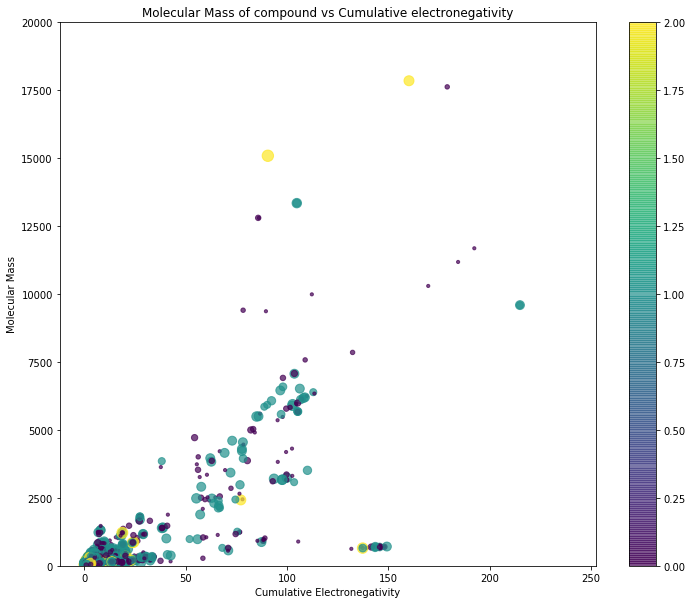

In [22]:
sorted_Tc = np.argsort(data_Tc)[::-1]
plt.figure(figsize=(12,10))
# plt.xlim(0,100)
plt.ylim(0,20000)
plt.title("Molecular Mass of compound vs Cumulative electronegativity")
plt.xlabel("Cumulative Electronegativity")
plt.ylabel("Molecular Mass")
plt.scatter(data_X[sorted_Tc], data_m_a[sorted_Tc], s=10*np.floor(data_Tc[sorted_Tc]/10), c=np.floor(data_Tc[sorted_Tc]/50), alpha=0.7)
plt.colorbar()
# plt.show()
plt.savefig("plot2.pdf")